In [84]:
import pandas as pd

# Use the full file path
file_path = r"C:\Users\Sammy\OneDrive\Desktop\mercydata_final.xlsx"

# Load the Excel file
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Display the first few rows to verify the data
print(df.head())


             hotel_name country           Place  price_usd  ReviewsCount  \
0  Fairmont The Norfolk   Kenya  Harry Thuku Rd        200           700   
1        Sarova Stanley   Kenya    Kenyatta Ave        180          1200   
2  Villa Rosa Kempinski   Kenya      Chiromo Rd        250           900   
3    Hemingways Nairobi   Kenya           Karen        300           850   
4  Serena Hotel Nairobi   Kenya    Kenyatta Ave        220          1000   

   Rating     City    State  Single_room  Double_room       Date  \
0     5.0  Nairobi  Nairobi          130          160 2024-01-01   
1     4.5  Nairobi  Nairobi          120          150 2024-01-02   
2     5.0  Nairobi  Nairobi          150          180 2024-01-03   
3     5.0  Nairobi  Nairobi          180          220 2024-01-04   
4     4.8  Nairobi  Nairobi          140          170 2024-01-05   

                    Season Tourist Demand Level Major Event Hotel Category  \
0  Short Dry Season (Peak)                 High         

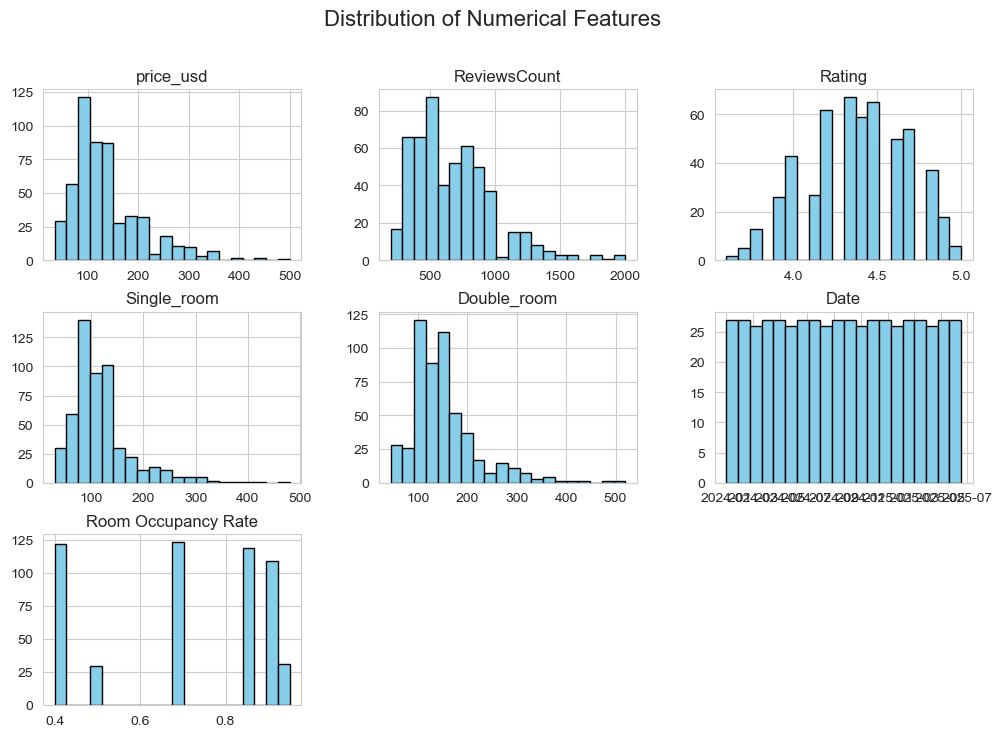

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Plot histograms for numerical columns
df.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


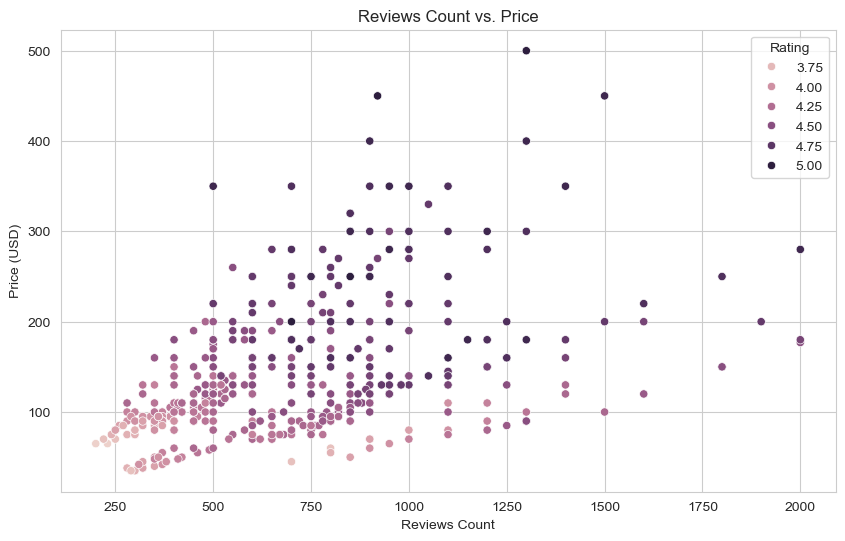

In [106]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="ReviewsCount", y="price_usd", data=numeric_df, hue="Rating")
plt.title("Reviews Count vs. Price")
plt.xlabel("Reviews Count")
plt.ylabel("Price (USD)")
plt.show()

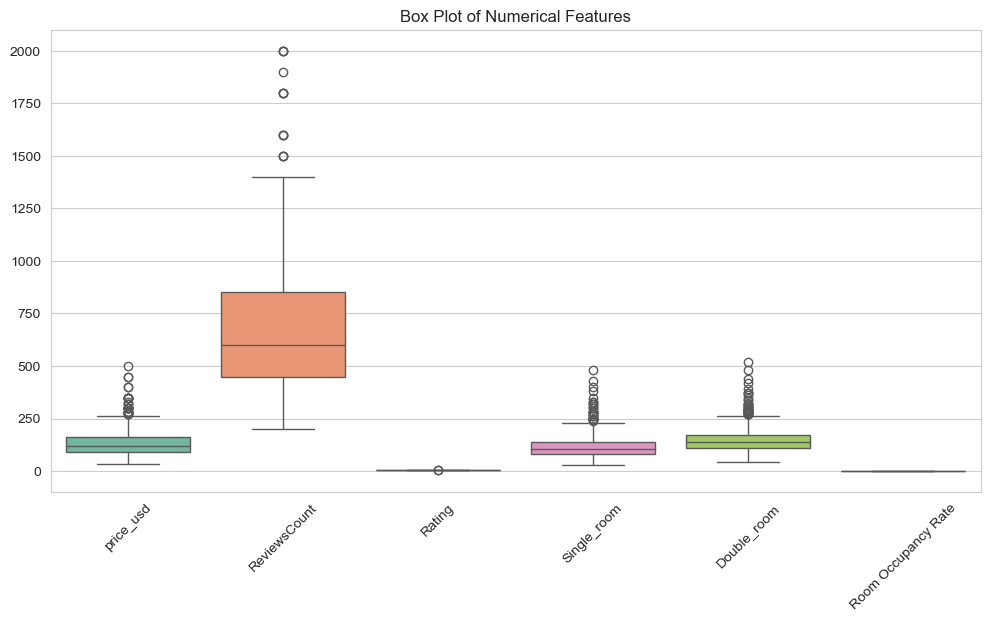

In [88]:
# Plot box plots for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols], palette="Set2")
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Features")
plt.show()


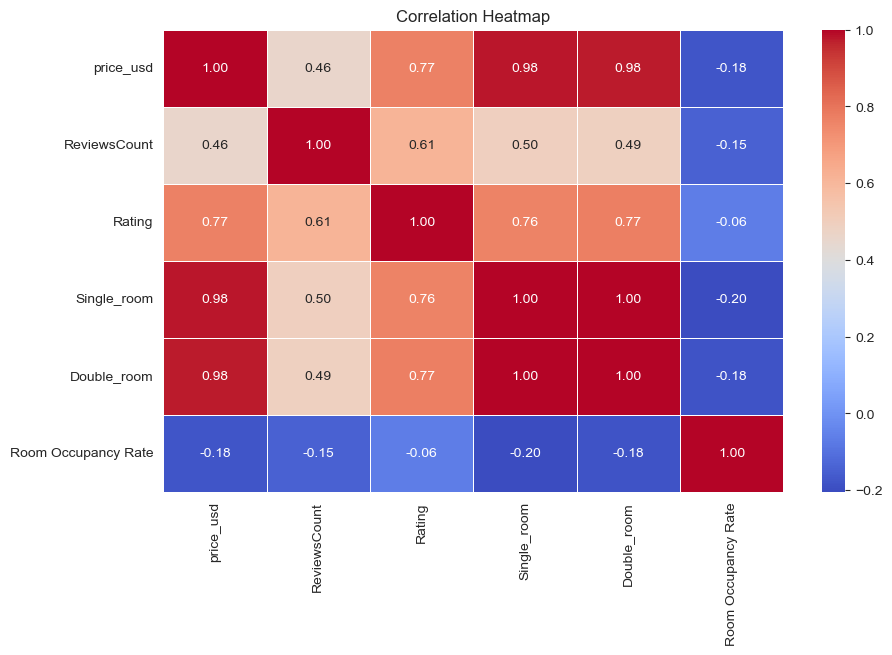

In [92]:
# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute and plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


C:\Users\Sammy\AppData\Local\Temp\ipykernel_21464\998983270.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Date", y="price_usd", ci=None, color="blue")


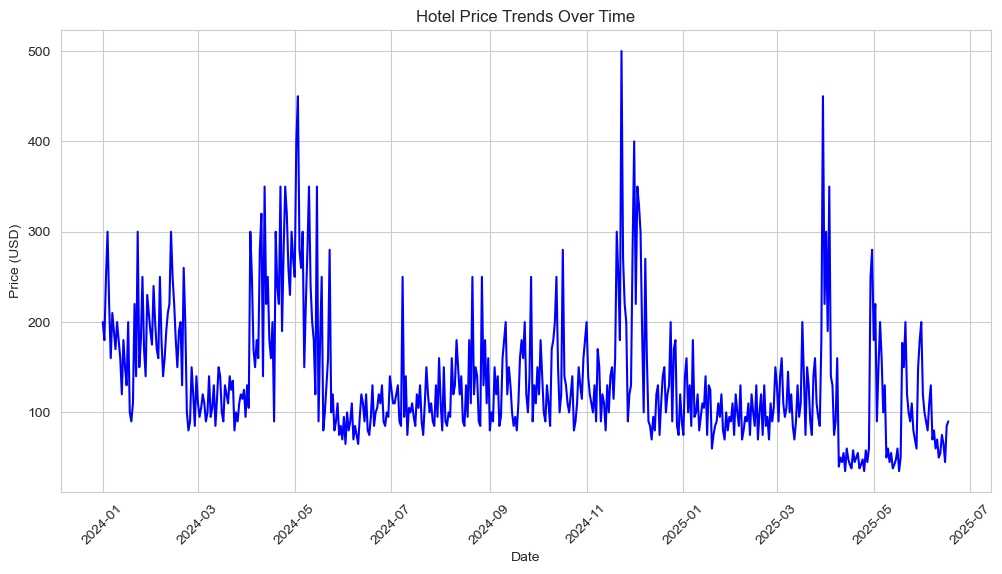

In [96]:
# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Sort data by date
df = df.sort_values(by="Date")

# Plot price trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="price_usd", ci=None, color="blue")
plt.title("Hotel Price Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.show()


C:\Users\Sammy\AppData\Local\Temp\ipykernel_21464\4274284558.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Season", y="price_usd", palette="Set2")


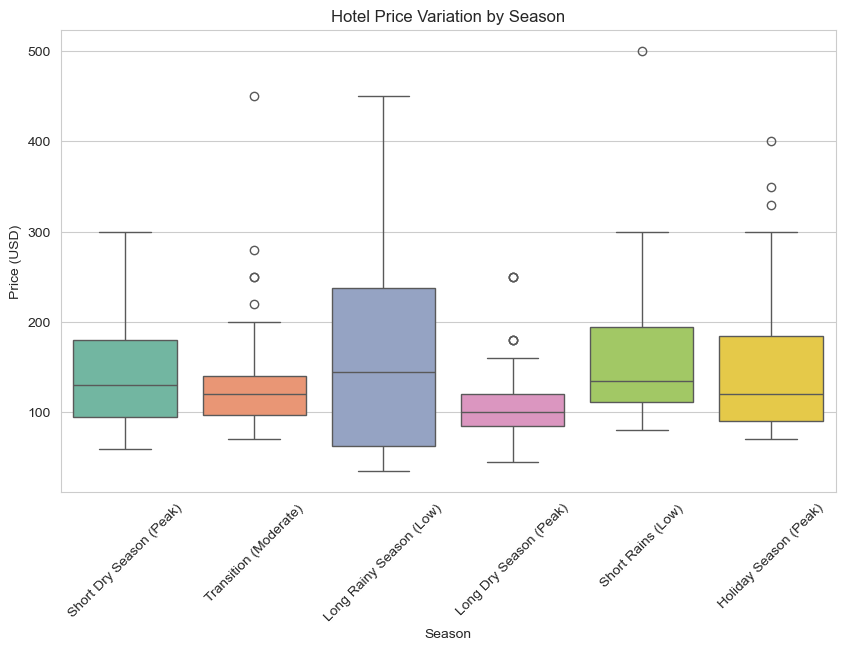

In [100]:
#Analyzing Seasonal Price Variations

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Season", y="price_usd", palette="Set2")
plt.title("Hotel Price Variation by Season")
plt.xlabel("Season")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.show()

C:\Users\Sammy\AppData\Local\Temp\ipykernel_21464\2928450037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Hotel Category", y="price_usd", palette="pastel")


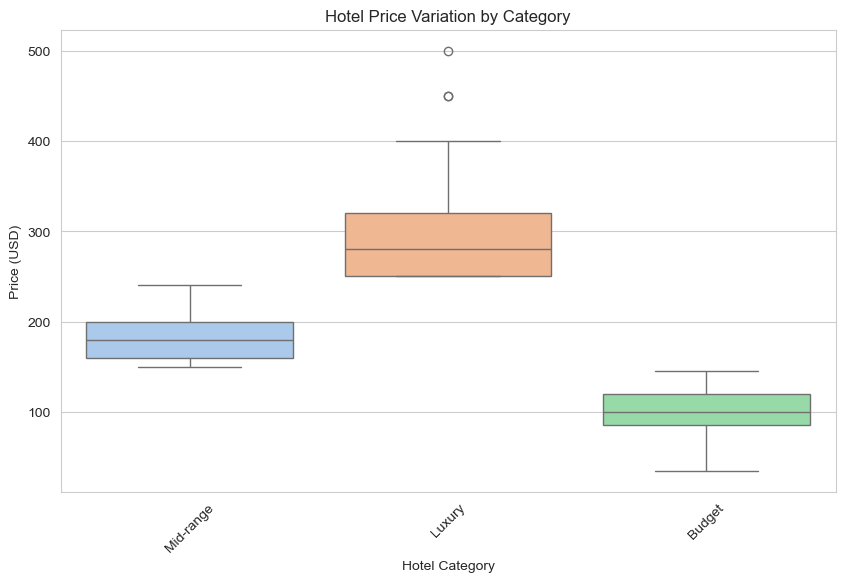

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Hotel Category", y="price_usd", palette="pastel")
plt.title("Hotel Price Variation by Category")
plt.xlabel("Hotel Category")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.show()

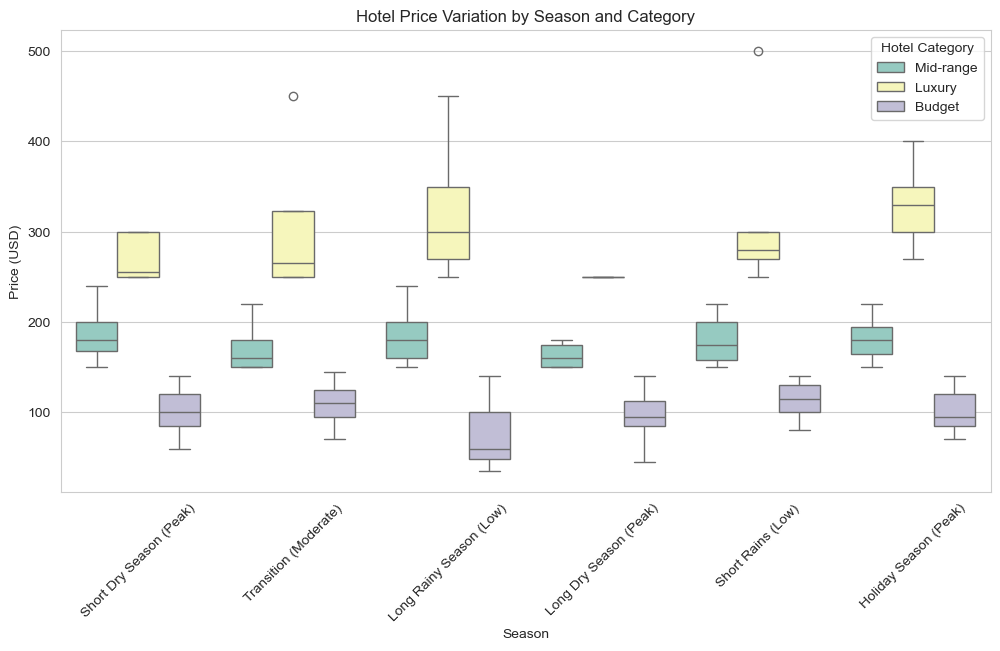

In [104]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Season", y="price_usd", hue="Hotel Category", palette="Set3")
plt.title("Hotel Price Variation by Season and Category")
plt.xlabel("Season")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.legend(title="Hotel Category")
plt.show()


In [42]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check data types of each column
print("\nData Types:\n", df.dtypes)


Missing Values:
 hotel_name                0
country                   0
Place                     0
price_usd                 0
ReviewsCount              0
Rating                    0
City                      0
State                     0
Single_room               0
Double_room               0
Date                      0
Season                    0
Tourist Demand Level      0
Major Event             304
Hotel Category            0
Room Occupancy Rate       0
Economic Impact           0
Local Event Impact      304
dtype: int64

Data Types:
 hotel_name                      object
country                         object
Place                           object
price_usd                        int64
ReviewsCount                     int64
Rating                         float64
City                            object
State                           object
Single_room                      int64
Double_room                      int64
Date                    datetime64[ns]
Season                 

In [44]:
from sklearn.preprocessing import LabelEncoder

# Define categorical columns to encode
categorical_cols = ["country", "City", "State", "Season", "Tourist Demand Level", 
                    "Major Event", "Hotel Category", "Economic Impact", "Local Event Impact"]

# Apply Label Encoding to categorical variables
label_encoders = {}
for col in categorical_cols:
    if col in df.columns:  # Ensure the column exists before encoding
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # Store encoders for future reference

print("Categorical encoding complete.")


Categorical encoding complete.


In [46]:
from sklearn.preprocessing import MinMaxScaler

# Define numerical columns to normalize
numerical_cols = ["price_usd", "ReviewsCount", "Rating", "Single_room", "Double_room", 
                  "Room Occupancy Rate"]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Numerical normalization complete.")


Numerical normalization complete.


In [48]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: Index(['country', 'price_usd', 'ReviewsCount', 'Rating', 'City', 'State',
       'Single_room', 'Double_room', 'Season', 'Tourist Demand Level',
       'Major Event', 'Hotel Category', 'Room Occupancy Rate',
       'Economic Impact', 'Local Event Impact'],
      dtype='object')
Categorical Columns: Index(['hotel_name', 'Place'], dtype='object')


In [50]:
import numpy as np

# Define a function to remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply outlier removal to numerical columns
df = remove_outliers(df, numerical_cols)

print("Outlier removal complete. Remaining records:", df.shape[0])


Outlier removal complete. Remaining records: 352


In [52]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=["price_usd"])  # Features (excluding price)
y = df["price_usd"]  # Target variable (price)

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split complete.")
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Data split complete.
Training set size: 281
Testing set size: 71


In [54]:
print(X_train.dtypes)

hotel_name                      object
country                          int32
Place                           object
ReviewsCount                   float64
Rating                         float64
City                             int32
State                            int32
Single_room                    float64
Double_room                    float64
Date                    datetime64[ns]
Season                           int32
Tourist Demand Level             int32
Major Event                      int32
Hotel Category                   int32
Room Occupancy Rate            float64
Economic Impact                  int32
Local Event Impact               int32
dtype: object


In [56]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())


hotel_name              0
country                 0
Place                   0
ReviewsCount            0
Rating                  0
City                    0
State                   0
Single_room             0
Double_room             0
Date                    0
Season                  0
Tourist Demand Level    0
Major Event             0
Hotel Category          0
Room Occupancy Rate     0
Economic Impact         0
Local Event Impact      0
dtype: int64
0


In [58]:
# Drop non-numeric columns
X_train = X_train.drop(columns=["hotel_name", "Place"], errors="ignore")
X_test = X_test.drop(columns=["hotel_name", "Place"], errors="ignore")

print("Dropped non-numeric columns. Retrying model training...")


Dropped non-numeric columns. Retrying model training...


In [62]:
# Drop the Date column (or extract features from it)
X_train = X_train.drop(columns=["Date"], errors="ignore")
X_test = X_test.drop(columns=["Date"], errors="ignore")

print("Date column removed. Retrying model training...")


Date column removed. Retrying model training...


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model training complete.")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Model training complete.
Mean Absolute Error (MAE): 0.003301226715129545
Mean Squared Error (MSE): 3.937112325938482e-05
R² Score: 0.9872354414487196


In [66]:
import joblib

# Save the trained model
model_filename = "hotel_price_predictor.pkl"
joblib.dump(model, model_filename)

print(f"Model saved as {model_filename}.")


Model saved as hotel_price_predictor.pkl.


In [68]:
from xgboost import XGBRegressor

# Initialize and train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Model Performance:")
print(f"MAE: {mae_xgb}")
print(f"MSE: {mse_xgb}")
print(f"R² Score: {r2_xgb}")


XGBoost Model Performance:
MAE: 0.003631615659889716
MSE: 4.0854516843192876e-05
R² Score: 0.9867545086561659


In [70]:
from lightgbm import LGBMRegressor

# Initialize and train LightGBM model
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm_model.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate performance
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print("LightGBM Model Performance:")
print(f"MAE: {mae_lgbm}")
print(f"MSE: {mse_lgbm}")
print(f"R² Score: {r2_lgbm}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 281, number of used features: 12
[LightGBM] [Info] Start training from score 0.136923
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [74]:
from sklearn.linear_model import LinearRegression

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Model Performance:")
print(f"MAE: {mae_lr}")
print(f"MSE: {mse_lr}")
print(f"R² Score: {r2_lr}")


Linear Regression Model Performance:
MAE: 0.004922006924103861
MSE: 4.280200494725672e-05
R² Score: 0.9861231112289583


In [80]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: catboost in c:\users\sammy\anaconda3\lib\site-packages (1.2.7)



In [82]:
from catboost import CatBoostRegressor

# Initialize and train CatBoost model
catboost_model = CatBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

# Make predictions
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate performance
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print("CatBoost Model Performance:")
print(f"MAE: {mae_catboost}")
print(f"MSE: {mse_catboost}")
print(f"R² Score: {r2_catboost}")


CatBoost Model Performance:
MAE: 0.00454903726249826
MSE: 3.8710100537673165e-05
R² Score: 0.9874497524090502


In [110]:
# Create a performance comparison table
model_performance = {
    "Model": ["Random Forest", "XGBoost", "LightGBM", "CatBoost", "Linear Regression"],
    "MAE": [mae, mae_xgb, mae_lgbm, mae_catboost, mae_lr],
    "MSE": [mse, mse_xgb, mse_lgbm, mse_catboost, mse_lr],
    "R² Score": [r2, r2_xgb, r2_lgbm, r2_catboost, r2_lr]
}

# Convert to a DataFrame
performance_df = pd.DataFrame(model_performance)

# Sort by R² Score (higher is better)
performance_df = performance_df.sort_values(by="R² Score", ascending=False)

# Display the results
print("Model Performance Comparison:")
print(performance_df)


Model Performance Comparison:
               Model       MAE       MSE  R² Score
3           CatBoost  0.004549  0.000039  0.987450
0      Random Forest  0.003301  0.000039  0.987235
1            XGBoost  0.003632  0.000041  0.986755
2           LightGBM  0.004386  0.000042  0.986441
4  Linear Regression  0.004922  0.000043  0.986123


C:\Users\Sammy\AppData\Local\Temp\ipykernel_21464\1981165647.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mae_scores, palette="Blues")


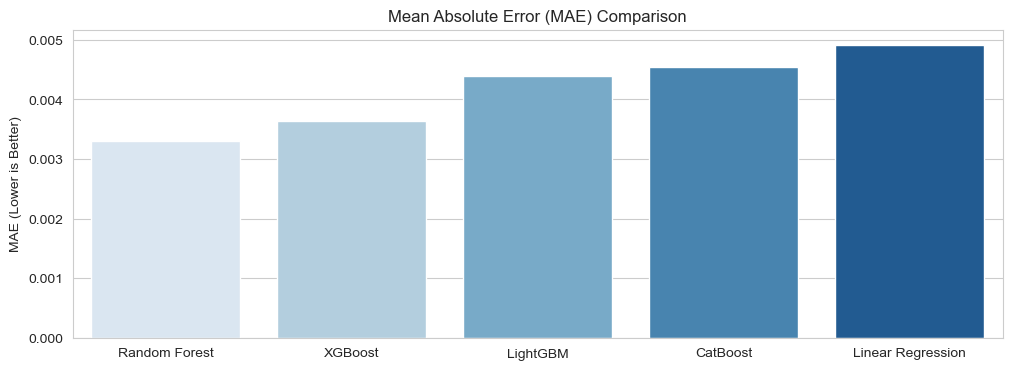

C:\Users\Sammy\AppData\Local\Temp\ipykernel_21464\1981165647.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse_scores, palette="Reds")


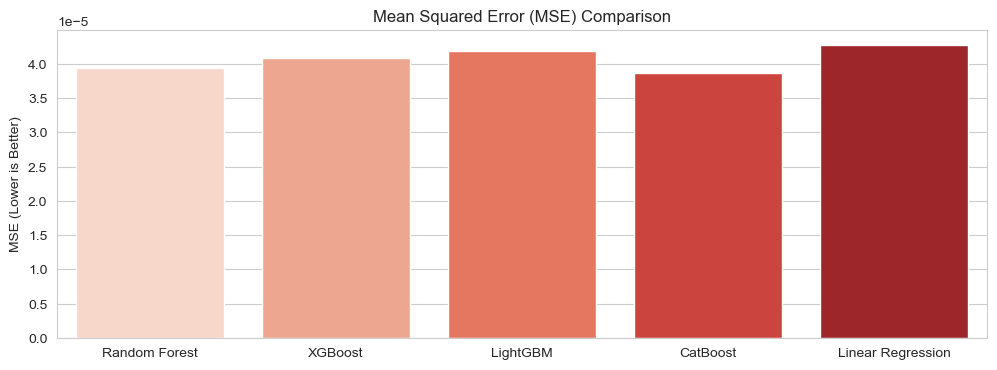

C:\Users\Sammy\AppData\Local\Temp\ipykernel_21464\1981165647.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette="Greens")


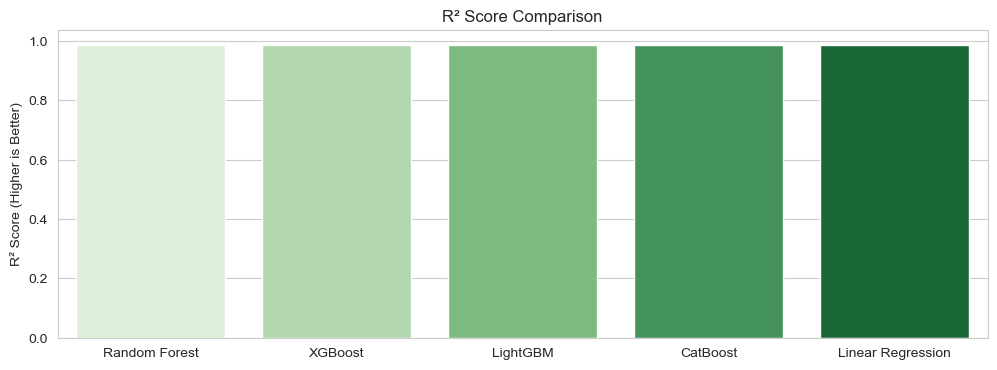

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define model names and their scores
models = ["Random Forest", "XGBoost", "LightGBM", "CatBoost", "Linear Regression"]
mae_scores = [mae, mae_xgb, mae_lgbm, mae_catboost, mae_lr]
mse_scores = [mse, mse_xgb, mse_lgbm, mse_catboost, mse_lr]
r2_scores = [r2, r2_xgb, r2_lgbm, r2_catboost, r2_lr]

# Set style
sns.set_style("whitegrid")

# Plot MAE comparison
plt.figure(figsize=(12, 4))
sns.barplot(x=models, y=mae_scores, palette="Blues")
plt.title("Mean Absolute Error (MAE) Comparison")
plt.ylabel("MAE (Lower is Better)")
plt.show()

# Plot MSE comparison
plt.figure(figsize=(12, 4))
sns.barplot(x=models, y=mse_scores, palette="Reds")
plt.title("Mean Squared Error (MSE) Comparison")
plt.ylabel("MSE (Lower is Better)")
plt.show()

# Plot R² Score comparison
plt.figure(figsize=(12, 4))
sns.barplot(x=models, y=r2_scores, palette="Greens")
plt.title("R² Score Comparison")
plt.ylabel("R² Score (Higher is Better)")
plt.show()


In [114]:
import joblib

# Choose the best model based on R² Score
best_model = max(
    [(model, r2), (xgb_model, r2_xgb), (lgbm_model, r2_lgbm), (catboost_model, r2_catboost), (lr_model, r2_lr)],
    key=lambda x: x[1]
)[0]

# Save the best model
joblib.dump(best_model, "best_hotel_price_model.pkl")

print("Best model saved as best_hotel_price_model.pkl")


Best model saved as best_hotel_price_model.pkl


In [116]:
import os

# Get the current directory
model_path = os.path.abspath("best_hotel_price_model.pkl")
print("Model saved at:", model_path)


Model saved at: C:\Users\Sammy\Desktop\best_hotel_price_model.pkl
